In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pypico
import numpy as np
from math import *
import sys
import pyfits as pf

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


In [2]:
%pwd

u'/Users/evanbiederstedt'

In [3]:
cd downloads

/Users/evanbiederstedt/Downloads


In [4]:
camb_file = "camb_76035535_scalcls.fits"

#pico = pypico.load_pico("pico3_tailmonty_v34.dat")
#outputs=['cl_TT']
#inputs=pico.example_inputs()
#result = pico.get(outputs, **inputs)

camb_output = pf.getdata(camb_file)

cll = camb_output.field(0)

print type(cll)
print len(cll)
print cll

<type 'numpy.ndarray'>
2201
[  0.00000000e+00   0.00000000e+00   1.26722688e-09 ...,   1.77521152e-16
   1.76313759e-16   1.75108524e-16]


In [5]:
#cls = result['cl_TT'][:3000]
cls = cll[2:]
print 'cls = ', cls
ntot = len(cls)
print 'number of cls = ', ntot

cls =  [  1.26722688e-09   5.90568039e-10   3.30355188e-10 ...,   1.77521152e-16
   1.76313759e-16   1.75108524e-16]
number of cls =  2199


In [6]:
type(cls)

numpy.ndarray

In [7]:
len(cls)

2199

In [8]:
ell = np.arange(len(cls))
norm = ell*(ell+1)/(2*pi)

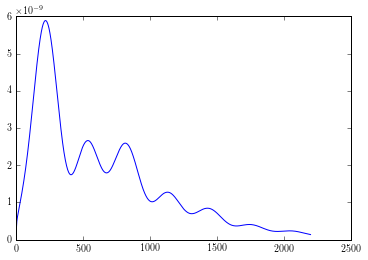

In [9]:
plt.plot(ell, norm*cls)

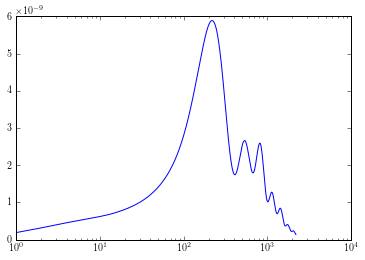

In [10]:
plt.semilogx(ell, norm*cls)

In [11]:
def legpols(n, t):
    pols = np.zeros(n+1)
    pols[0] = 1.0
    pols[1] = t
    for i in range(1,n):
        pols[i+1] = ((i*2.0+1)*t*pols[i] - i*pols[i-1])/(i+1.0)        
    return pols

In [12]:
n = 2000
alphas = np.exp(np.linspace(np.log(pi/18000), np.log(pi), num=n, endpoint=False))
print 'alphas = ', alphas

alphas =  [  1.74532925e-04   1.75390071e-04   1.76251426e-04 ...,   3.09575772e+00
   3.11096124e+00   3.12623943e+00]


In [13]:
val = np.zeros(n)

In [14]:
for i in range(n):
    t = cos(alphas[i])
    pols = legpols(ntot+10, t)
    val[i] = 0
    for j in range(ntot):
        val[i] = val[i] + (2.0*j+1)*cls[j]*pols[j]


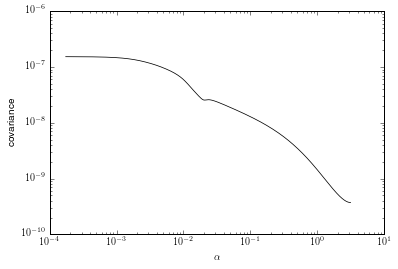

In [15]:
plt.plot(alphas, val, 'k-', linewidth=.75 ,alpha=1.)
plt.plot(alphas, -val, 'r-', linewidth=.75 ,alpha=1.)
plt.loglog()
plt.xlabel(r"$\alpha$")
plt.ylabel("covariance")